In [1]:
import bamboolib as bm
import pandas_ta as ta

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
bm
import pandas as pd
df = pd.read_csv(r'D:\dataset\owid-covid-data.csv', sep=',', decimal='.')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155853,ZWE,Africa,Zimbabwe,2022-01-15,225637.0,0.0,531.286,5238.0,0.0,12.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
155854,ZWE,Africa,Zimbabwe,2022-01-16,226078.0,441.0,594.286,5247.0,9.0,14.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
155855,ZWE,Africa,Zimbabwe,2022-01-17,226460.0,382.0,494.286,5258.0,11.0,11.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
155856,ZWE,Africa,Zimbabwe,2022-01-18,226460.0,0.0,494.286,5258.0,0.0,11.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [4]:
df_d =pd.DataFrame ()

In [46]:
df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [6]:
df_d["date"] =df['date']
df_d['dead']= df["new_deaths"]
df_d['vac'] =df['total_vaccinations']
df_d['case'] =df['new_cases']


In [31]:
df_f=df_d.groupby("date").max()

In [32]:
df_f= df_f.reset_index()

In [33]:
df_f.head()

,date,dead,vac,case
0,2020-01-01,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN


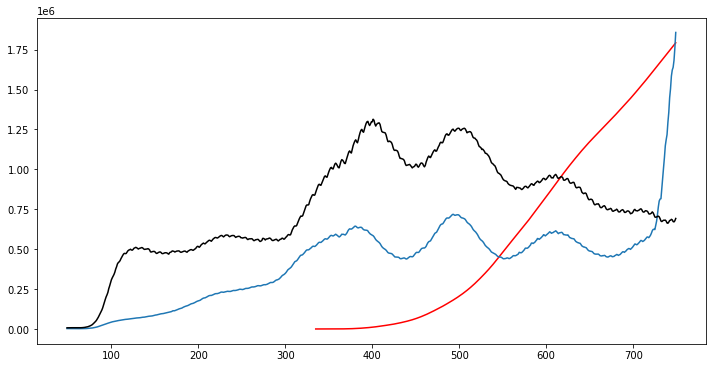

In [60]:
x = df_f.date
y1 =df_f.ta.ema(close='vac', length=50, append=True)/5000
y2 =df_f.ta.ema(close='case', length=50, append=True)
y3 = df_f.ta.ema(close ='dead',length=50, append=True )*100
fig, ax = plt.subplots()

ax.plot(y1, color= 'red', label= 'vac')
ax.plot(y2, label='case')
ax.plot(y3, color='black', label='dead')

#ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
#fig.set_facecolor('floralwhite')

plt.show()

In [44]:
df_fu=df.loc[df['location']=='Ukraine'].reset_index()

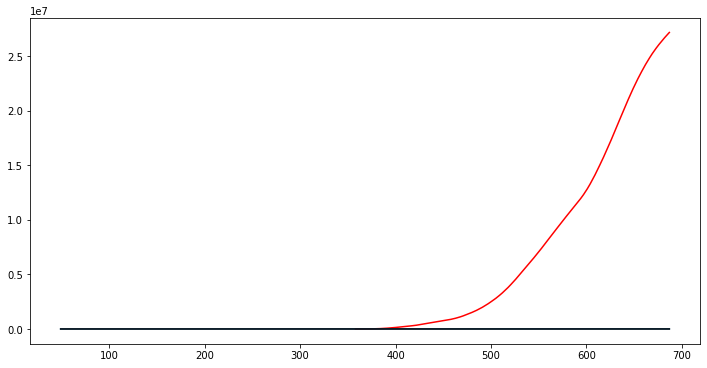

In [69]:
y1 =df_fu.ta.ema(close='total_vaccinations', length=50, append=True)
y2 =df_fu.ta.ema(close='new_cases', length=50, append=True)
y3 = df_fu.ta.ema(close ='new_deaths',length=50, append=True )
fig, ax = plt.subplots()

ax.plot(y1, color= 'red', label= 'vac')
ax.plot(y2, label='case')
ax.plot(y3, color='black', label='dead')

#ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
#fig.set_facecolor('floralwhite')

plt.show()

In [47]:
df_fuae=df.loc[df['location']=='United Arab Emirates'].reset_index()

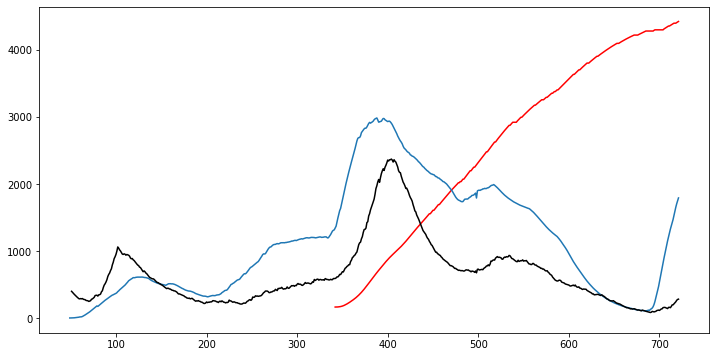

In [62]:
y1 =df_fuae.ta.ema(close='total_vaccinations', length=50, append=True)/5000
y2 =df_fuae.ta.ema(close='new_cases', length=50, append=True)
y3 = df_fuae.ta.ema(close ='new_deaths',length=50, append=True )*200
fig, ax = plt.subplots()

ax.plot(y1, color= 'red', label= 'vac')
ax.plot(y2, label='case')
ax.plot(y3, color='black', label='dead')

#ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
#fig.set_facecolor('floralwhite')

plt.show()

In [67]:
def country_graf(country):
    df_fuae=df.loc[df['location']==country].reset_index()
    y1 =df_fuae.ta.ema(close='total_vaccinations', length=50, append=True)/5000
    y2 =df_fuae.ta.ema(close='new_cases', length=50, append=True)
    y3 = df_fuae.ta.ema(close ='new_deaths',length=50, append=True )*20
    fig, ax = plt.subplots()

    ax.plot(y1, color= 'red', label= 'vac')
    ax.plot(y2, label='case')
    ax.plot(y3, color='black', label='dead')

    #ax.set_facecolor('seashell')
    fig.set_figwidth(12)    #  ширина Figure
    fig.set_figheight(6)    #  высота Figure
    #fig.set_facecolor('floralwhite')

    plt.show()

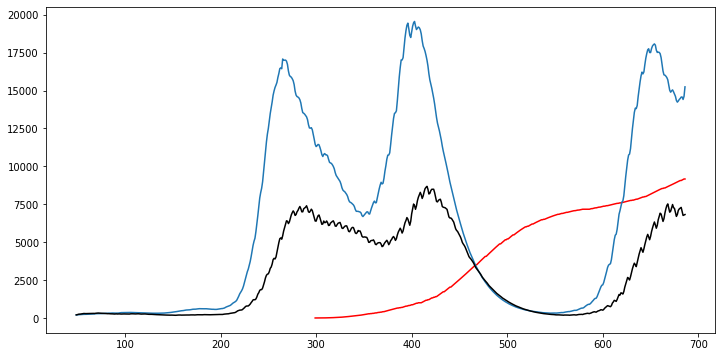

In [68]:
country_graf('Poland')

In [58]:
df_f['Ema_d']=df_f.ta.ema(close='dead', length=100, append=True)
df_f['Ema_v']=df_f.ta.ema(close='vac', length=100, append=True)
df_f['Ema_c'] = df_f.ta.ema(close='case', length=100, append=True)

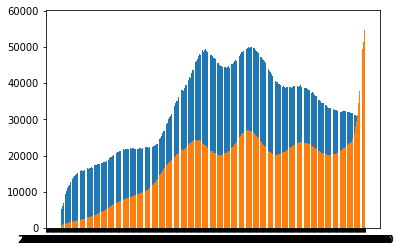

In [63]:
fig, ax = plt.subplots()
#ax.plot(df_f.date, df_f["dead"], color = 'green') 
#ax.plot(df_f.date, df_f["vac"], color = 'red') 
ax.bar(df_f["date"], df_f["Ema_d"])
#ax.bar(df_f["date"], df_f["Ema_v"]/800000)
ax.bar(df_f["date"], df_f["Ema_c"]/100)
plt.show() 

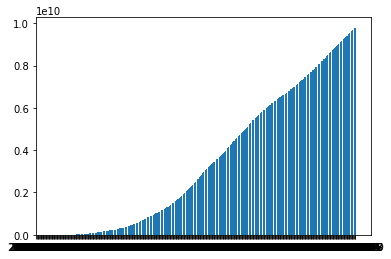

In [22]:
fig, ax = plt.subplots()
#ax.plot(df_f.date, df_f["dead"], color = 'green') 
#ax.plot(df_f.date, df_f["vac"], color = 'red') 
ax.bar(df_f["date"], df_f["vac"])
plt.show() 

In [70]:
df_loc=df.groupby("date").max()
df_loc=df.groupby("location").max()

In [71]:
df_loc = df_loc.reset_index()
df_loc

,location,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Afghanistan,AFG,Asia,2022-01-19,159070.0,3243.0,2095.571,7386.0,159.0,97.571,...,NaN,NaN,37.746,0.500,64.83,0.511,NaN,NaN,NaN,NaN
1,Africa,OWID_AFR,NaN,2022-01-19,10436374.0,60523.0,46050.000,234188.0,1513.0,984.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,Europe,2022-01-19,239129.0,4789.0,2290.714,3283.0,21.0,20.429,...,7.100,51.200,NaN,2.890,78.57,0.795,10964.8,32.80,120.15,3816.586110
3,Algeria,DZA,Africa,2022-01-19,228918.0,1927.0,1518.000,6443.0,49.0,38.286,...,0.700,30.400,83.741,1.900,76.88,0.748,NaN,NaN,NaN,NaN
4,Andorra,AND,Europe,2022-01-19,29888.0,1575.0,534.286,142.0,6.0,2.000,...,29.000,37.800,NaN,NaN,83.73,0.868,89.6,46.81,145.90,1158.311141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Wallis and Futuna,WLF,Oceania,2022-01-19,454.0,47.0,23.714,7.0,2.0,0.571,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
234,World,OWID_WRL,NaN,2022-01-19,339295783.0,4231832.0,3095396.429,5565198.0,18061.0,14704.714,...,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
235,Yemen,YEM,Asia,2022-01-19,10449.0,174.0,109.429,1994.0,52.0,16.429,...,7.600,29.200,49.542,0.700,66.12,0.470,NaN,NaN,NaN,NaN
236,Zambia,ZMB,Africa,2022-01-19,299172.0,5555.0,3870.857,3877.0,72.0,61.429,...,3.100,24.700,13.938,2.000,63.89,0.584,NaN,NaN,NaN,NaN
